In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 9.1 Coupled Oscillators and Normal Modes

One-dimensional chain of $N$ particles each of mass $m$. Particles coupled with massless springs with force constant $k$. The equilibrium separation between particles is $a$.

$$ m \frac{d^2u_j(t)}{dt^2} = -k \left[ 2 u_j(t) - u_{j+1}(t) - u_{j-1}(t) \right]$$

See textbook to understand how this model is derived and review analytical solution in terms of normal modes.

## 9.2 Numerical Solutions

Recall that a generic form for an initial value problem (IVP) can be written as:

$$\begin{align}
\frac{d y}{dt} &= f(t, y) \\
y(t_0) &= y_0
\end{align}
$$

## Example 1

As a basic example, suppose

$$\begin{align}
\frac{d y}{dt} &= y \\
y(0) &= 1
\end{align}
$$

that is, $f(t, y) = y$ and $t_0 = 0$, then we may recognize that the analytical solution is


$$ y(t) = e^t$$

The Python library `scipy` comes with a suite of numerical solvers.

> See SciPy Reference for `scipy.integrate.solve_ivp()`

In [29]:
from scipy.integrate import solve_ivp

In [90]:
def f(t, y):
    return y

t = np.arange(0, 3.0, 0.1)

sol = solve_ivp(f,        # fun: callable
                [0, 3],   # t_span: 2-tuple of floats
                [1],      # y0: array_like, shape (n,)
                t_eval=t,        # t_eval: array_like or None, optional        
               )

In [91]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])
 t_events: None
        y: array([[ 1.        ,  1.10517092,  1.22143377,  1.34992484,  1.49188296,
         1.64872543,  1.82204806,  2.01362513,  2.2254094 ,  2.45953214,
         2.71830307,  3.00424885,  3.32044662,  3.66982068,  4.05565203,
         4.48175534,  4.95247897,  5.47270492,  6.04784884,  6.68386009,
         7.38722166,  8.16495021,  9.02459606,  9.97424321, 11.02334191,
        12.18275049, 13.46393845, 14.87980129, 16.44466191, 18.1742707 ]])
 y_events: None

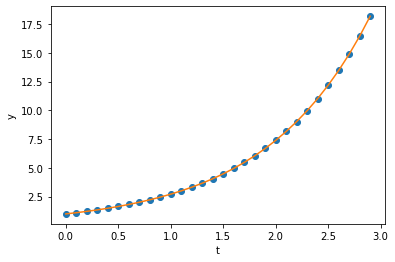

In [93]:
plt.plot(sol.t, sol.y[0], 'o')
plt.plot(t, np.exp(t))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### Example 2

We an also solve a system of ordinary differential equations.  For example the Lotka-Volerra equations (a model predator-prey population dynamics),

$$ \begin{align}
\frac{d x}{dt} &= a x - b x y \\
\frac{d y}{dt} &= -c x + d x y
\end{align} $$

where $a=1.5$, $b=1$, $c=3$, and $d=1$.

Here, the *state* is the vector $\vec{z} = (x, y)$.


In [94]:
def lotkavolterra(t, z, a, b, c, d):
    
    x, y = z  # unpacking state vector
    
    dxdt = a*x - b*x*y
    dydt = -c*y + d*x*y
    
    return [dxdt, dydt]

In [96]:
sol = solve_ivp(lotkavolterra,         # fun
                [0, 15],               # t_span
                [10, 5],               # y0 
                args=(1.5, 1, 3, 1),   # arguments
                dense_output=True      # return a continuous function
               )    

In [97]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 470
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fef2c30bfd0>
   status: 0
  success: True
        t: array([ 0.        ,  0.05573717,  0.20079817,  0.34290464,  0.49324333,
        0.71327321,  0.96769484,  1.3310762 ,  1.66297332,  2.01584196,
        2.39785934,  2.86334175,  3.42577701,  3.75497984,  3.99154881,
        4.21914842,  4.31236716,  4.4055859 ,  4.58646786,  4.75225717,
        4.91203619,  5.15218572,  5.4826018 ,  5.81145913,  6.15484299,
        6.51826717,  6.92707802,  7.47819674,  7.90122886,  8.21339516,
        8.43659215,  8.64507275,  8.79867076,  8.95226876,  9.10838041,
        9.3028147 ,  9.54701784,  9.87311478, 10.19921173, 10.54490389,
       10.91207689, 11.33136536, 11.89933709, 12.30230554, 12.56778348,
       12.79738185, 12.96717881, 13.13697577, 13.21014924, 13.2833227 ,
       13.43978039, 13.61928959, 13.859

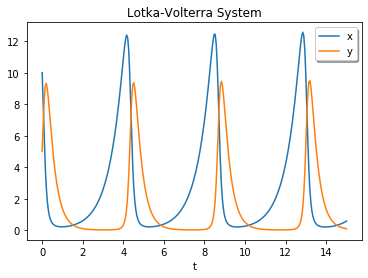

In [101]:
t = np.linspace(0, 15, 300)

z = sol.sol(t)

plt.plot(t, z.T)

plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

### Numerical solution

Let's use `solve_ivp` to solve

$$ m \frac{d^2u_j(t)}{dt^2} = -k \left[ 2 u_j(t) - u_{j+1}(t) - u_{j-1}(t) \right]$$

The state vector is composed of the displace of each particle $u_j$ and the derivatives (velocity) of each particle $v_j = \frac{du_j}{dt}$.

Let the state vector of $N$ oscillators be ordered as $\{u_0, v_0, u_1, v_1, \ldots, u_N, v_N, u_{N+1},v_{N+1}\}$. This include the "particles" attached to the walls so  $v_0 = 0$ and $v_{N+1} = 0$ always.

In [116]:
def oscillator(t, state, k, m):
    
    N = int(len(state)/2-2)

    rate = np.zeros_like(state)
    
    for i in range(1, N+1):
        rate[2*i]   = state[2*i+1]
        rate[2*i+1] = -k/m *(2 * state[2*i] - state[2*i - 2] - state[2*i+2] )
        
    return rate

In [123]:
sol = solve_ivp(oscillator,         # fun
                [0, 10],               # t_span
                [0, 0, 1, 0, -1, 0, 0, 0],               # y0 
                args=(1, 1),   # arguments
                dense_output=True # return a continuous function
               ) 

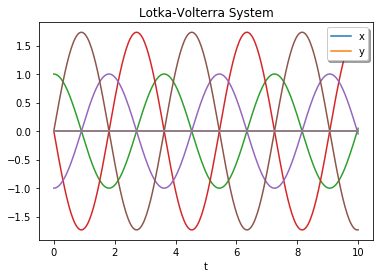

In [125]:
t = np.linspace(0, 10, 300)

z = sol.sol(t)

plt.plot(t, z.T)

plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()